In [40]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
(X_train, y_train) ,(X_test, y_test) = datasets.cifar10.load_data()

In [42]:
X_train = X_train/ 255.0
X_test = X_test/ 255.0

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [ ]:
model = models.Sequential()

model.add(data_augmentation)

model.add(layers.Conv2D(32, (3, 3), activation ='relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation ='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

In [45]:
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.3086 - loss: 1.8759 - val_accuracy: 0.4366 - val_loss: 1.5581
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.3986 - loss: 1.6507 - val_accuracy: 0.4790 - val_loss: 1.4238
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.4301 - loss: 1.5700 - val_accuracy: 0.5282 - val_loss: 1.3196
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.4448 - loss: 1.5354 - val_accuracy: 0.5491 - val_loss: 1.2697
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4592 - loss: 1.4989 - val_accuracy: 0.5608 - val_loss: 1.2502
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.4677 - loss: 1.4786 - val_accuracy: 0.5567 - val_loss: 1.2364
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.4748 - loss: 1.4636 - val_accuracy: 0.5744 - val_loss: 1.2017
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4818 -

In [46]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


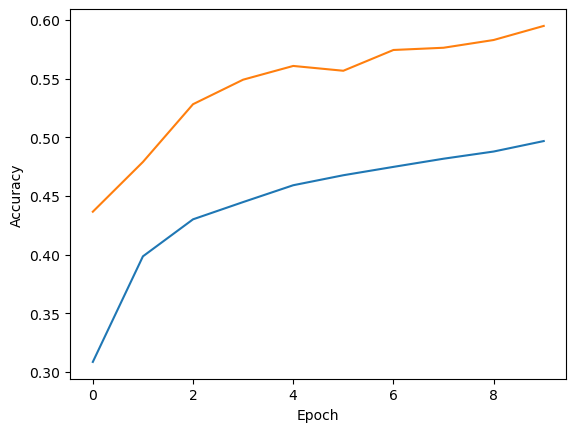

In [47]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
